<a href="https://colab.research.google.com/github/rebeckakarras/Lab3/blob/main/labb3-kl1826.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from lab import run_experiment

In [44]:
import pandas as pd
import numpy as np
from numpy.random import rand
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [45]:
T = 30.1 #degrees
c = 1.9 * 10**(-3) #mol
run_experiment(T,c)

3.186500088836696

2-Level factorial design basis
Choosing a high and a low value
T_high = 40
T_low = 20
c_high = 3 mmol
c_low = 1 mmol
with 30.1 and 1.9 mmol as my centerpoints.


In [81]:
inputs_labels = {'A' : 'Temperature',
                 'B' : 'Concentration',
                 }

dat = [('A',15,35),
       ('B', 1 * 10**(-3),3*10**(-3)),
     ]

inputs_df = pd.DataFrame(dat,columns=['index','low','high'])
inputs_df = inputs_df.set_index(['index'])
inputs_df['label'] = inputs_df.index.map( lambda z : inputs_labels[z] )

inputs_df

,low,high,label
index,,,
A,15.000,35.000,Temperature
B,0.001,0.003,Concentration


In [82]:
inputs_df['average'] = inputs_df.apply( lambda z : ( z['high'] + z['low'])/2 , axis=1)
inputs_df['span'] = inputs_df.apply( lambda z : ( z['high'] - z['low'])/2 , axis=1)

inputs_df['encoded_low'] = inputs_df.apply( lambda z : ( z['low']  - z['average'] )/( z['span'] ), axis=1)
inputs_df['encoded_high'] = inputs_df.apply( lambda z : ( z['high'] - z['average'] )/( z['span'] ), axis=1)

inputs_df = inputs_df.drop(['average','span'],axis=1)

inputs_df

,low,high,label,encoded_low,encoded_high
index,,,,,
A,15.000,35.000,Temperature,-1.0,1.0
B,0.001,0.003,Concentration,-1.0,1.0


In [83]:
import itertools
# we have four repetitions
encoded_inputs= list(itertools.product([-1,1],[-1,1]))
encoded = pd.DataFrame(encoded_inputs, columns=['T', 'c'])
encoded

,T,c
0,-1,-1
1,-1,1
2,1,-1
3,1,1


In [84]:
def decode_input(encoded_input, inputs_df):
    decoded_values = []
    for idx, val in enumerate(encoded_input):
        if val == -1:
            decoded_values.append(inputs_df.iloc[idx]['low'])
        else:
            decoded_values.append(inputs_df.iloc[idx]['high'])
    return decoded_values

# Apply the decoding function to each encoded input
decoded_experiments = [decode_input(encoded_input, inputs_df) for encoded_input in encoded_inputs]

# Create a new DataFrame with the decoded values
decoded_df = pd.DataFrame(decoded_experiments, columns=inputs_labels)
decoded_df.head()

,A,B
0,15.0,0.001
1,15.0,0.003
2,35.0,0.001
3,35.0,0.003


In [90]:
#orginal data
results = [2.89998853,  3.40460836, 5.8830253,  12.03046496 ]

resultsorg = pd.DataFrame(results, columns=["y1"])
resultsorg

,y1
0,2.899989
1,3.404608
2,5.883025
3,12.030465


In [91]:
import pandas as pd
import itertools
import random
center_T = 30.1  # center temperature chosen from the given value
center_c = 1.9 * 10**(-3)  # center concentration chosen from the given value
results_df = pd.DataFrame()

# Define the decode_input function from the encoded inputs
def decode_input(encoded_input, inputs_df):
    decoded_values = []
    for idx, val in enumerate(encoded_input):
        if val == -1:
            decoded_values.append(inputs_df.iloc[idx]['low'])
        else:
            decoded_values.append(inputs_df.iloc[idx]['high'])
    return decoded_values

# Decode the values for each encoded input
decoded_experiments = [decode_input(encoded_input, inputs_df) for encoded_input in encoded_inputs]

# Initialize results list
generated_data = []
# Number of repetitions for each encoded input
num_repetitions = 1

# Loop through each encoded input
for encoded_input in encoded_inputs:
    # Decode to get base values
    low_T, high_T = inputs_df.iloc[0]['low'], inputs_df.iloc[0]['high']
    low_c, high_c = inputs_df.iloc[1]['low'], inputs_df.iloc[1]['high']

    # Decode the current encoded input to get the low or high value
    T_decoded, c_decoded = decode_input(encoded_input, inputs_df)

    # Generate matching values multiple times
    for _ in range(num_repetitions):
        # Randomize T based on whether it is decoded to low or high
        if T_decoded == low_T:
            # Randomize a value below center_T
            T_randomized = random.uniform(low_T, center_T)
        else:
            # Randomize a value above center_T
            T_randomized = random.uniform(center_T, high_T)

        # Randomize c based on whether it is decoded to low or high
        if c_decoded == low_c:
            # Randomize a value below center_c
            c_randomized = random.uniform(low_c, center_c)
        else:
            # Randomize a value above center_c
            c_randomized = random.uniform(center_c, high_c)

        # Append generated data to the list (T_randomized, c_randomized, and encoded_input)
        Result = run_experiment(T_randomized, c_randomized)
        results.append(Result) # Run the experiment with these values

        #results_df = pd.DataFrame(results, columns=[f'y{_+1}' for i in range(num_repetitions)])

        #generated_data.append((T_randomized, c_randomized, Result))
        #generated_data_df = pd.DataFrame(generated_data, columns=['T', 'c',])
# Convert generated data to a DataFrame for better organization


# Display the generated values
#print(generated_data_df)


In [92]:
combined_output = pd.concat([encoded, resultsorg], axis=1)
combined_output

,T,c,y1
0,-1,-1,2.899989
1,-1,1,3.404608
2,1,-1,5.883025
3,1,1,12.030465


In [93]:
labels = ['T','c']

main_effects = {}
rep=1
for j in range(0,rep):
    index=j+1
    for key in labels:
        effects = combined_output.groupby(key)['y'+str(index)].mean()
        main_effects[j,key] = sum( [i*effects[i] for i in [-1,1]])

print('Main effects')
print(main_effects)

average_main_effects = {}
#this will be similar due to only two factors are used.
print('Average main effects')
for key in labels:
        average_effects = combined_output.groupby(key)['y1'].mean()
        average_main_effects[key] = sum( [i*average_effects[i] for i in [-1,1]])
print(average_main_effects)

Main effects
{(0, 'T'): 5.804446685, (0, 'c'): 3.3260297450000005}
Average main effects
{'T': 5.804446685, 'c': 3.3260297450000005}


In [94]:
import itertools

twoway_labels = list(itertools.combinations(labels, 2))


twoway_effects = {}
for key in twoway_labels:

    effects = combined_output.groupby([key[0],key[1]])['y1'].mean()

    twoway_effects[key] = sum([ i*j*effects[i][j]/2 for i in [-1,1] for j in [-1,1] ])
twoway_effects

{('T', 'c'): 2.821409915}

In [95]:
effects=[] #pd.DataFrame({})
indexes=[]
for i,k in enumerate(average_main_effects.keys()):
    effects.append(abs(average_main_effects[k]))
    indexes.append(k)
for i,k in enumerate(twoway_effects.keys()):
    effects.append(abs(twoway_effects[k]))
    indexes.append(k)

effects_df=pd.DataFrame({"Standardized effect":effects})

# reset the indexes
effects_df.index=indexes
# Sort values in descending order
effects_df = effects_df.sort_values(by='Standardized effect', ascending=False)
# Add cumulative percentage column
effects_df["cummunalitive percentage"] = round(effects_df["Standardized effect"].cumsum()/effects_df["Standardized effect"].sum()*100,2)

# Display data frame
effects_df

,Standardized effect,cummunalitive percentage
T,5.804447,48.57
c,3.326030,76.39
"(T, c)",2.821410,100.00


Text(0.5, 1.0, 'y1')

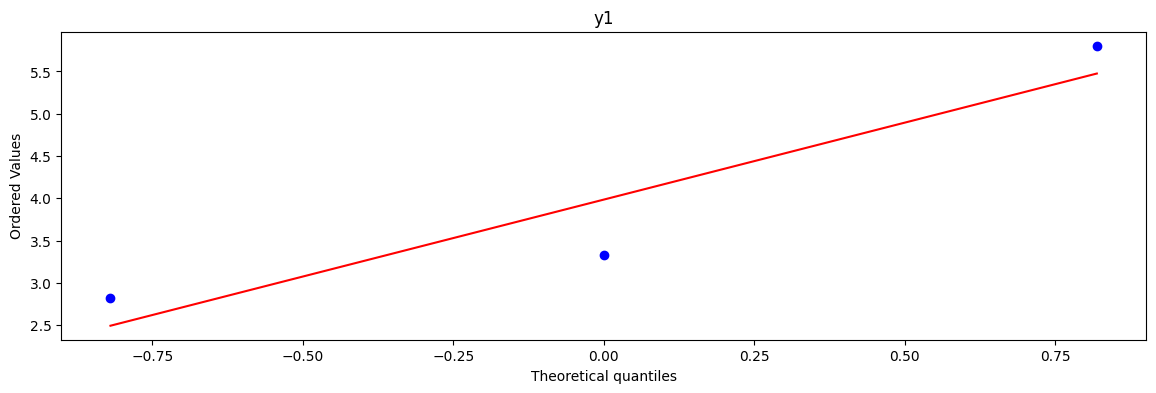

In [96]:
from matplotlib.pyplot import *
import scipy.stats as stats
fig = figure(figsize=(14,4))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(132)
#ax3 = fig.add_subplot(133)

stats.probplot(effects_df["Standardized effect"], dist="norm", plot=ax1)
ax1.set_title('y1')

In [97]:
s = "yhat = "

s += "%0.3f "%(combined_output['y1'].mean())

for i,k in enumerate(average_main_effects.keys()):
    if(average_main_effects[k]<0):
        s += "%0.3f %s "%( average_main_effects[k]/2.0, k )
    else:
        s += "+ %0.3f %s "%( average_main_effects[k]/2.0, k )

for i,k in enumerate(twoway_effects.keys()):
    if(twoway_effects[k]<0):
        s += " %0.3f %s %s"%( twoway_effects[k]/2.0, k[0],k[1])
    else:
        s += "+ %0.3f %s %s"%( twoway_effects[k]/2.0, k[0],k[1])

print(s)

yhat = 6.055 + 2.902 T + 1.663 c + 1.411 T c


In [98]:
sigmasquared = 0.0050
k = len(inputs_df.index)
Vmean = (sigmasquared)/(2**k)
Veffect = (4*sigmasquared)/(2**k)
print("Variance in mean: %0.6f"%(Vmean))
print("Variance in effects: %0.6f"%(Veffect))

Variance in mean: 0.001250
Variance in effects: 0.005000


In [99]:
sigmasquared = 0.0050
r=4
k = len(inputs_df.index)
Vmean = (sigmasquared)/(r*2**k)
Veffect = (4*sigmasquared)/(r*2**k)
print("Variance in mean: %0.6f"%(Vmean))
print("Variance in effects: %0.6f"%(Veffect))

Variance in mean: 0.000313
Variance in effects: 0.001250


In [100]:
print(np.sqrt(Vmean))
print(np.sqrt(Veffect))

0.017677669529663688
0.035355339059327376


In [101]:
#no noise hence the perfect results.
y1 = combined_output['y1']
xlabs=['T','c']
x = combined_output[xlabs]
x = sm.add_constant(x)

res1 = smf.ols(formula='y1 ~ T + c + T:c', data=combined_output).fit()

res1.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normal

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                nan
Time:                        13:40:34   Log-Likelihood:                 130.31
No. Observations:                   4   AIC:                            -252.6
Df Residuals:                       0   BIC:                            -255.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0545        inf          0        nan         nan         nan
T              2.9022        inf          0        nan         nan         nan
c              1.6630        inf          0        nan         nan         nan
T:c            1.4107        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.133
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.578
Skew:                          -0.115   Prob(JB):                        0.749
Kurtosis:                       1.152   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
res2 = smf.ols(formula='y1 ~ c + T + T:c + I(T**2) + I(c**2)', data=combined_output).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                nan
Time:                        13:40:39   Log-Likelihood:                 127.90
No. Observations:                   4   AIC:                            -247.8
Df Residuals:                       0   BIC:                            -250.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0182        inf          0        n

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normal

Optimization

In [176]:
inputs_labels = {'A' : 'Temperature',
                 'B' : 'Concentration',
                 }

dat = [('A',15,25,35),
       ('B', 1.95,2,2.05),
     ]

inputs_df = pd.DataFrame(dat,columns=['index','low','center','high'])
inputs_df = inputs_df.set_index(['index'])
inputs_df['label'] = inputs_df.index.map( lambda z : inputs_labels[z] )

inputs_df

,low,center,high,label
index,,,,
A,15.00,25,35.00,Temperature
B,1.95,2,2.05,Concentration


In [177]:
# compute averages and span
inputs_df['average'] = inputs_df.apply( lambda z : ( z['high'] + z['low'])/2 , axis=1)
inputs_df['span'] = inputs_df.apply( lambda z : ( z['high'] - z['low'])/2 , axis=1)

# encode the data
inputs_df['encoded_low'] = inputs_df.apply( lambda z : ( z['low']  - z['average'] )/( z['span'] ), axis=1)
inputs_df['encoded_center'] = inputs_df.apply( lambda z : ( z['center'] - z['average'] )/( z['span'] ), axis=1)
inputs_df['encoded_high'] = inputs_df.apply( lambda z : ( z['high'] - z['average'] )/( z['span'] ), axis=1)

inputs_df = inputs_df.drop(['average','span'],axis=1)

inputs_df

,low,center,high,label,encoded_low,encoded_center,encoded_high
index,,,,,,,
A,15.00,25,35.00,Temperature,-1.0,0.0,1.0
B,1.95,2,2.05,Concentration,-1.0,0.0,1.0


In [178]:
import itertools
encoded_inputs= list(itertools.product([-1,1],[-1,1]))
encoded_inputs
for i in range(0,5):
    encoded_inputs.append((0,0))
encoded_inputs

[(-1, -1), (-1, 1), (1, -1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]

In [160]:
results=pd.DataFrame(encoded_inputs)
results=results[results.columns[::-1]]
results.columns=['A','B']
results

,A,B
0,-1,-1
1,1,-1
2,-1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0


In [179]:
def parse_values(x):
    if x < 2:
       return x * 10
    elif x < 4:
       return x ** 2
    else:
       return x + 10

real_experiment = results
var_labels = []
for var in ['A','B']:
    var_label = inputs_df.loc[var]['label']
    var_labels.append(var_label)
    real_experiment[var_label] = results.apply(
        lambda z : inputs_df.loc[var]['low'] if z[var]<0 else (inputs_df.loc[var]['high'] if z[var]>0 else inputs_df.loc[var]['center']), axis=1)


real_experiment[var_labels]

,Temperature,Concentration
0,15.0,1.95
1,35.0,1.95
2,15.0,2.05
3,35.0,2.05
4,25.0,2.00
5,25.0,2.00
6,25.0,2.00
7,25.0,2.00
8,25.0,2.00


In [180]:
#need to randomize values for the centerpoints
import random
experiment_results = [3.161645078398407, 8.818603462257467, 3.3010259130332984, 9.016058995325636, 5.68320685229769,
 5.789504000747021,
 5.863166591162294,
 5.647103571513824,
 5.747158560790277]
resultsorg = pd.DataFrame(experiment_results, columns=["y1"])
resultsorg

,y1
0,3.161645
1,8.818603
2,3.301026
3,9.016059
4,5.683207
5,5.789504
6,5.863167
7,5.647104
8,5.747159


In [181]:
df = pd.concat([results,resultsorg], axis=1)
df

,A,B,Temperature,Concentration,y1
0,-1,-1,15.0,1.95,3.161645
1,1,-1,35.0,1.95,8.818603
2,-1,1,15.0,2.05,3.301026
3,1,1,35.0,2.05,9.016059
4,0,0,25.0,2.00,5.683207
5,0,0,25.0,2.00,5.789504
6,0,0,25.0,2.00,5.863167
7,0,0,25.0,2.00,5.647104
8,0,0,25.0,2.00,5.747159


In [182]:
df2 = pd.DataFrame(df,columns=['A','B','y1'])

df2

,A,B,y1
0,-1,-1,3.161645
1,1,-1,8.818603
2,-1,1,3.301026
3,1,1,9.016059
4,0,0,5.683207
5,0,0,5.789504
6,0,0,5.863167
7,0,0,5.647104
8,0,0,5.747159


In [183]:
labels = ['A','B']
ybar = df['y1'].mean()
print(ybar)

main_effects = {}

print('main effects')
for key in labels:
        average_effects = df.groupby(key)['y1'].mean()
        main_effects[key] = sum( [i*average_effects[i] for i in [-1,1]])
print(main_effects)

5.891941447280657
main effects
{'A': 5.685995733075699, 'B': 0.1684181838515295}


y = 5.88 + 3.326A + 5.804B + AB
A / 3.326 = 1 / 5.08

In [184]:
y1 = df['y1']
xlabs=['A','B']
x = df[xlabs]
x = sm.add_constant(x)

res1 = smf.ols(formula='y1 ~ A + B + A:B', data=df).fit()

res1.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     200.6
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           1.25e-05
Time:                        15:18:05   Log-Likelihood:                 3.0280
No. Observations:                   9   AIC:                             1.944
Df Residuals:                       5   BIC:                             2.733
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8919      0.077     76.225      0.000       5.693       6.091
A              2.8430      0.116     24.520      0.000       2.545       3.141
B              0.0842      0.116      0.726      0.500      -0.214       0.382
A:B            0.0145      0.116      0.125      0.905      -0.284       0.313
==============================================================================
Omnibus:                        4.443   Durbin-Watson:                   0.842
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                1.089
Skew:                          -0.078   Prob(JB):                        0.580
Kurtosis:                       1.303   Cond. No.                         1.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
twoway_labels = list(itertools.combinations(labels, 2))


twoway_effects = {}
for key in twoway_labels:

    effects = df.groupby([key[0],key[1]])['y1'].mean()

    twoway_effects[key] = sum([ i*j*effects[i][j]/2 for i in [-1,1] for j in [-1,1] ])
twoway_effects

{('A', 'B'): 0.029037349216638475}

Steepest ascent


In [187]:
B = main_effects['B']/main_effects['A']
B

0.029619822412428696

1/A =

In [190]:
Origin = [24,2-B]
delta= [1,B]
march=[]
for i in range(0,30):
    march.append((Origin[0]+(i+1)*delta[0],Origin[1]+(i+1)*delta[1]))

March=pd.DataFrame(march,columns=['T', 'c'])
March

,T,c
0,25,2.000000
1,26,2.029620
2,27,2.059240
3,28,2.088859
4,29,2.118479
5,30,2.148099
6,31,2.177719
7,32,2.207339
8,33,2.236959
9,34,2.266578


In [149]:
import numpy as np
import pandas as pd

# Define initial values and step sizes
Origin = [25, 0.002]  # Initial values for T and c
delta = [B, 0.0001]  # Step sizes for T and c
max_iterations = 100  # Maximum number of iterations
iteration = 0

march = []
results = []

# Initial values
T, c = Origin

# Run the first experiment to get the initial result
Result2 = run_experiment(T, c)
results.append(Result2)
march.append((T, c))

# Define the improvement condition (to keep track of when to stop)
improvement = float('inf')

# Define the while loop for steepest ascent
while improvement > 0 and iteration < max_iterations:


    # Generate new points for T and c based on the delta values
    T_new = T + delta[0]
    c_new = c + delta[1]

    # Run the experiment with the new values
    new_result = run_experiment(T_new, c_new)

    # Save the new results
    march.append((T_new, c_new))
    results.append(new_result)

    # Calculate the improvement (difference between current and previous result)
    improvement = new_result - results[-2]

    # If the improvement is positive, continue with new values
    if improvement > 0:
        T, c = T_new, c_new
        iteration += 1
    else:
        # no further improvement, stop the loop
        break

# After the loop, create a DataFrame of the results
March_df = pd.DataFrame(march, columns=['T', 'c'])
results_df = pd.DataFrame(results, columns=["y2"])

print(f"Steepest ascent finished in {iteration} iterations.")
print("Optimal values of T and c:", T, c)
print("Maximum value of y2:", results[-1])

Steepest ascent finished in 14 iterations.
Optimal values of T and c: 33.02219728373643 0.0033999999999999976
Maximum value of y2: 4.397923065706579


Text(0, 0.5, 'Yield')

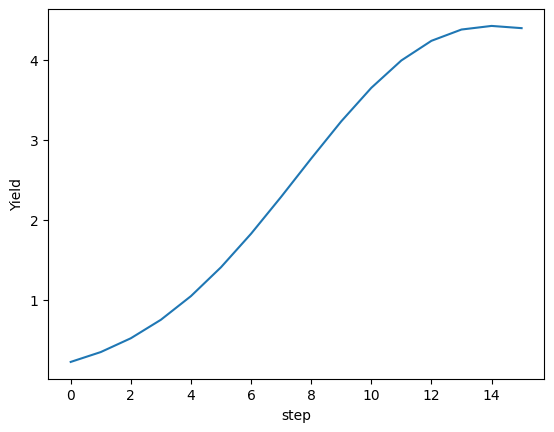

In [150]:
ax=results_df['y2'].plot()
ax.set_xlabel("step")
ax.set_ylabel("Yield")

In [80]:
#need to randomize values for the centerpoints
import pandas as pd
import itertools
import random
center_T = 30.1  # center temperature chosen from the given value
center_c = 1.9 * 10**(-3)  # center concentration chosen from the given value
results_df = pd.DataFrame()

# Define the decode_input function from the encoded inputs
def decode_input(encoded_input, inputs_df):
    decoded_values = []
    for idx, val in enumerate(encoded_input):
        if val == -1:
            decoded_values.append(inputs_df.iloc[idx]['low'])
        else:
            decoded_values.append(inputs_df.iloc[idx]['high'])
    return decoded_values

# Decode the values for each encoded input
decoded_experiments = [decode_input(encoded_input, inputs_df) for encoded_input in encoded_inputs]

# Initialize results list
generated_data = []
# Number of repetitions for each encoded input
num_repetitions = 1

# Loop through each encoded input
for encoded_input in encoded_inputs:
    # Decode to get base values
    low_T, high_T = inputs_df.iloc[0]['low'], inputs_df.iloc[0]['high']
    low_c, high_c = inputs_df.iloc[1]['low'], inputs_df.iloc[1]['high']

    # Decode the current encoded input to get the low or high value
    T_decoded, c_decoded = decode_input(encoded_input, inputs_df)

    # Generate matching values multiple times
    for _ in range(num_repetitions):
        # Randomize T based on whether it is decoded to low or high
        if T_decoded == low_T:
            # Randomize a value below center_T
            T_randomized = random.uniform(low_T, center_T)
        else:
            # Randomize a value above center_T
            T_randomized = random.uniform(center_T, high_T)

        # Randomize c based on whether it is decoded to low or high
        if c_decoded == low_c:
            # Randomize a value below center_c
            c_randomized = random.uniform(low_c, center_c)
        else:
            # Randomize a value above center_c
            c_randomized = random.uniform(center_c, high_c)

        # Append generated data to the list (T_randomized, c_randomized, and encoded_input)
        Result = run_experiment(T_randomized, c_randomized)
        print(Result)
        #results.append(Result) # Run the experiment with these values

        #results_df = pd.DataFrame(results, columns=[f'y{_+1}' for i in range(num_repetitions)])

        #generated_data.append((T_randomized, c_randomized, Result))
        #generated_data_df = pd.DataFrame(generated_data, columns=['T', 'c',])
# Convert generated data to a DataFrame for better organization


# Display the generated values
#print(generated_data_df)

1.594324081869251
0.6960597401270473
4.29183349211972
4.420816006140357
4.2874001304447615
4.394609957401488
3.9515932874230377
4.248137418879134
4.399087387545892
